In [32]:
# import pandas 
import pandas as pd
import seaborn as sns


In [33]:
import numpy as np
import scipy as sp
import matplotlib.mlab as mlab


from scipy import interpolate



print("# numpy version = ",np.__version__)
print("# scipt version = ",sp.__version__)
import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec
import matplotlib.dates as mdates 

# numpy version =  1.24.3
# scipt version =  1.10.1


In [34]:

print("# pandas version = ",pd.__version__)

# pandas version =  2.0.2


In [35]:
# plot 
# PFO layout
plt.rcParams['figure.figsize'] = 12,10
plt.rcParams['figure.figsize'] = 10,10

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [36]:
HF_fi = "https://ncedc.org/ftp/outgoing/taira/HFRC/sliprate/nointerp.-10.0-75.0distx.-1.5-50.0depth.slip_cm_.csv"


In [37]:
CF_fi = "https://ncedc.org/ftp/outgoing/taira/HFRC/sliprate/nointerp.75.0-140.0distx.-1.5-50.0depth.slip_cm_.csv"


In [38]:

NHF_fi = "https://ncedc.org/ftp/outgoing/taira/HFRC/sliprate/nointerp.-10.0-25.0distx.-1.5-50.0depth.slip_cm_.csv"
SHF_fi = "https://ncedc.org/ftp/outgoing/taira/HFRC/sliprate/nointerp.25.0-75.0distx.-1.5-50.0depth.slip_cm_.csv"


In [39]:
SHF_sub1_fi = "https://ncedc.org/ftp/outgoing/taira/HFRC/sliprate/nointerp.25.0-60.0distx.-1.5-50.0depth.slip_cm_.csv"
SHF_sub2_fi = "https://ncedc.org/ftp/outgoing/taira/HFRC/sliprate/nointerp.60.0-75.0distx.-1.5-50.0depth.slip_cm_.csv"


In [40]:

NCF_fi = "https://ncedc.org/ftp/outgoing/taira/HFRC/sliprate/nointerp.75.0-95.0distx.-1.5-50.0depth.slip_cm_.csv"
SCF_fi = "https://ncedc.org/ftp/outgoing/taira/HFRC/sliprate/nointerp.95.0-140.0distx.-1.5-50.0depth.slip_cm_.csv"


In [41]:
# read csv file
HF_df = pd.read_csv(HF_fi,   
                       sep=",", header=0)

CF_df = pd.read_csv(CF_fi,   
                       sep=",", header=0)

In [42]:
NHF_df = pd.read_csv(NHF_fi,   
                       sep=",", header=0)

SHF_df = pd.read_csv(SHF_fi,   
                       sep=",", header=0)

In [43]:
SHF_sub1_df = pd.read_csv(SHF_sub1_fi,   
                       sep=",", header=0)
SHF_sub2_df = pd.read_csv(SHF_sub2_fi,   
                       sep=",", header=0)

In [44]:
NCF_df = pd.read_csv(NCF_fi,   
                       sep=",", header=0)

SCF_df = pd.read_csv(SCF_fi,   
                       sep=",", header=0)

In [45]:
HF_df.head()

sdummy        timeY  NorAccDCm    AccDCm      DCm   mag     seqid   dist_x  \
0     NaN  1984.318258    0.01954   5.29420  5.29420  1.36  HFRC1271  61.7010   
1     NaN  1984.825798    0.03650   9.89253  4.59833  1.12  HFRC1025  45.2268   
2     NaN  1984.895312    0.05327  14.43718  4.54465  1.10  HFRC1012  55.5966   
3     NaN  1985.066086    0.07436  20.15131  5.71413  1.49   HFRC983  69.5105   
4     NaN  1985.378333    0.09401  25.47668  5.32537  1.37   HFRC946  60.4003   

     dist_y    dep  Unnamed: 10  
0  2.911420  5.970          NaN  
1  0.951424  4.550          NaN  
2  1.747780  3.164          NaN  
3  3.767950  3.738          NaN  
4  2.466070  4.622          NaN

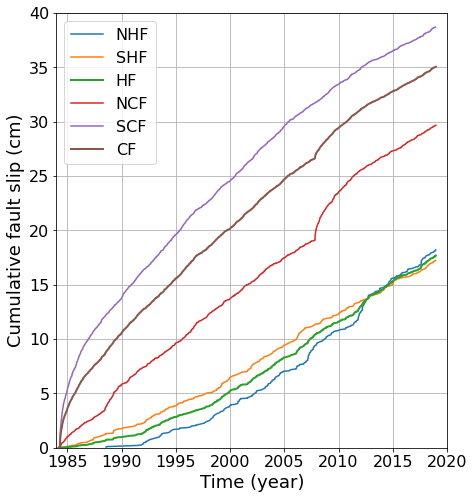

In [46]:

plt.rcParams['figure.figsize'] = 7, 8
png_fi = "HFRC_cumularive_slip.png"
pdf_fi = "HFRC_cumularive_slip.pdf"

plt.plot(NHF_df['timeY'], NHF_df['NorAccDCm'], label="NHF")
plt.plot(SHF_df['timeY'], SHF_df['NorAccDCm'], label="SHF")

plt.plot(HF_df['timeY'], HF_df['NorAccDCm'], label="HF", linewidth=2.0)

plt.plot(NCF_df['timeY'], NCF_df['NorAccDCm'], label="NCF")
plt.plot(SCF_df['timeY'], SCF_df['NorAccDCm'], label="SCF")

plt.plot(CF_df['timeY'], CF_df['NorAccDCm'], label="CF", linewidth=2.0)


xmin = 1984
xmax = 2020
ymin = 0
ymax = 40

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])


plt.grid()

plt.xlabel("Time (year)")
plt.ylabel("Cumulative fault slip (cm)")
plt.legend(loc="upper left")

plt.savefig(png_fi, bbox_inches = 'tight', dpi=150)
plt.savefig(pdf_fi, bbox_inches = 'tight', dpi=150)


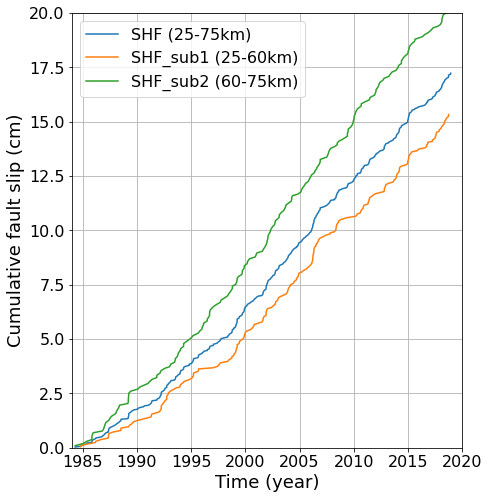

In [47]:

plt.rcParams['figure.figsize'] = 7, 8
png_fi = "SHF_cumularive_slip.png"
pdf_fi = "SHF_cumularive_slip.pdf"

plt.plot(SHF_df['timeY'], SHF_df['NorAccDCm'], label="SHF (25-75km)")
plt.plot(SHF_sub1_df['timeY'], SHF_sub1_df['NorAccDCm'], label="SHF_sub1 (25-60km)")
plt.plot(SHF_sub2_df['timeY'], SHF_sub2_df['NorAccDCm'], label="SHF_sub2 (60-75km)")



xmin = 1984
xmax = 2020
ymin = 0
ymax = 20

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])


plt.grid()

plt.xlabel("Time (year)")
plt.ylabel("Cumulative fault slip (cm)")
plt.legend(loc="upper left")

plt.savefig(png_fi, bbox_inches = 'tight', dpi=150)
plt.savefig(pdf_fi, bbox_inches = 'tight', dpi=150)

In [48]:
from datetime import datetime, timedelta
def year_decimal(start):
    year = int(start)
    rem = start - year
    base = datetime(year, 1, 1)
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    #print(result)
    return result

In [49]:
def df_year_time(df):

    year_time = []
    #decimal_time_lapse = np.zeros(len(time))

    for i in range(len(df['timeY'])):
        #print(i)
        yt_tmp = year_decimal(df['timeY'][i])
        yt_tmp2 = yt_tmp.strftime("%Y-%m-%dT%H:%M:%S.%f")

        #decimal_time[i] = decimal_year(dt)
        #year_time.append(yt_tmp)
        year_time.append(yt_tmp2)
        
        #print(year_time)
    
    return year_time

In [50]:
from obspy import UTCDateTime

def decimal_year(time):
        """
        Return (floating point) decimal year representation of UTCDateTime
        input value
        """
        start_of_year = UTCDateTime(time.year, 1, 1).timestamp
        end_of_year = UTCDateTime(time.year + 1, 1, 1).timestamp
        timestamp = time.timestamp
        year_fraction = ((timestamp - start_of_year) /
                         (end_of_year - start_of_year))
        return time.year + year_fraction

In [51]:
def df_time_index(df):
    df['timeUTC'] = df_year_time(df)
    df['time'] = pd.to_datetime(df['timeUTC'])
    df.set_index('time', inplace=True)

In [52]:
df_time_index(NHF_df)

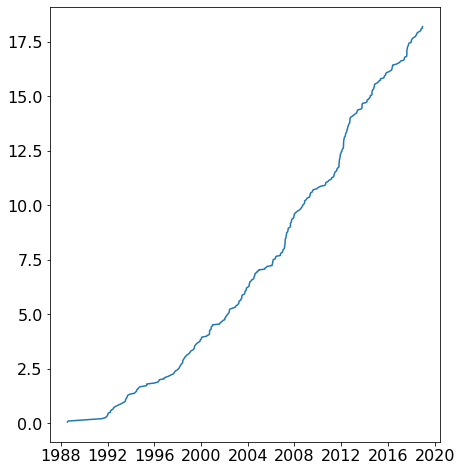

In [53]:
plt.plot(NHF_df.index, NHF_df['NorAccDCm'])

In [54]:
NHF_df

sdummy        timeY  NorAccDCm      AccDCm  \
time                                                                     
1988-07-27 14:18:13.377663     NaN  1988.569934    0.06425     8.22337   
1988-08-18 14:00:18.553870     NaN  1988.630010    0.10941    14.00500   
1990-06-23 20:20:34.755420     NaN  1990.476295    0.17916    22.93291   
1991-07-05 14:07:06.209527     NaN  1991.508461    0.21863    27.98417   
1991-11-04 14:40:42.569572     NaN  1991.842772    0.26883    34.41031   
...                            ...          ...        ...         ...   
2018-10-25 16:11:50.103831     NaN  2018.815548   18.04594  2309.88076   
2018-10-25 16:23:47.869497     NaN  2018.815570   18.08587  2314.99169   
2018-12-06 13:15:00.884099     NaN  2018.930280   18.12309  2319.75490   
2018-12-06 23:16:11.120725     NaN  2018.931423   18.15922  2324.38031   
2018-12-17 02:48:05.342445     NaN  2018.959224   18.20207  2329.86434   

                                DCm   mag    seqid    dist_x    dist_y    dep  \
time                                                                            
1988-07-27 14:18:13.377663  8.22337  2.11  HFRC745  15.65280  0.593325  9.384   
1988-08-18 14:00:18.553870  5.78163  1.51  HFRC736  16.57590  0.460393  9.817   
1990-06-23 20:20:34.755420  8.92791  2.25  HFRC631   8.34687  0.986180  8.541   
1991-07-05 14:07:06.209527  5.05126  1.28  HFRC591  15.47720  0.712783  8.970   
1991-11-04 14:40:42.569572  6.42614  1.69  HFRC579  17.64500  0.480381  8.960   
...                             ...   ...      ...       ...       ...    ...   
2018-10-25 16:11:50.103831  5.61436  1.46  HFRC112   8.73298  0.356627  5.571   
2018-10-25 16:23:47.869497  5.11093  1.30  HFRC112   8.73298  0.356627  5.571   
2018-12-06 13:15:00.884099  4.76321  1.18  HFRC400  13.38390  0.093008  4.106   
2018-12-06 23:16:11.120725  4.62541  1.13  HFRC353  13.38270  0.128127  4.191   
2018-12-17 02:48:05.342445  5.48403  1.42  HFRC381   3.80312 -0.649771  1.746   

                            Unnamed: 10                     timeUTC  
time                                                                 
1988-07-27 14:18:13.377663          NaN  1988-07-27T14:18:13.377663  
1988-08-18 14:00:18.553870          NaN  1988-08-18T14:00:18.553870  
1990-06-23 20:20:34.755420          NaN  1990-06-23T20:20:34.755420  
1991-07-05 14:07:06.209527          NaN  1991-07-05T14:07:06.209527  
1991-11-04 14:40:42.569572          NaN  1991-11-04T14:40:42.569572  
...                                 ...                         ...  
2018-10-25 16:11:50.103831          NaN  2018-10-25T16:11:50.103831  
2018-10-25 16:23:47.869497          NaN  2018-10-25T16:23:47.869497  
2018-12-06 13:15:00.884099          NaN  2018-12-06T13:15:00.884099  
2018-12-06 23:16:11.120725          NaN  2018-12-06T23:16:11.120725  
2018-12-17 02:48:05.342445          NaN  2018-12-17T02:48:05.342445  

[364 rows x 12 columns]

In [55]:
NHF_df

sdummy        timeY  NorAccDCm      AccDCm  \
time                                                                     
1988-07-27 14:18:13.377663     NaN  1988.569934    0.06425     8.22337   
1988-08-18 14:00:18.553870     NaN  1988.630010    0.10941    14.00500   
1990-06-23 20:20:34.755420     NaN  1990.476295    0.17916    22.93291   
1991-07-05 14:07:06.209527     NaN  1991.508461    0.21863    27.98417   
1991-11-04 14:40:42.569572     NaN  1991.842772    0.26883    34.41031   
...                            ...          ...        ...         ...   
2018-10-25 16:11:50.103831     NaN  2018.815548   18.04594  2309.88076   
2018-10-25 16:23:47.869497     NaN  2018.815570   18.08587  2314.99169   
2018-12-06 13:15:00.884099     NaN  2018.930280   18.12309  2319.75490   
2018-12-06 23:16:11.120725     NaN  2018.931423   18.15922  2324.38031   
2018-12-17 02:48:05.342445     NaN  2018.959224   18.20207  2329.86434   

                                DCm   mag    seqid    dist_x    dist_y    dep  \
time                                                                            
1988-07-27 14:18:13.377663  8.22337  2.11  HFRC745  15.65280  0.593325  9.384   
1988-08-18 14:00:18.553870  5.78163  1.51  HFRC736  16.57590  0.460393  9.817   
1990-06-23 20:20:34.755420  8.92791  2.25  HFRC631   8.34687  0.986180  8.541   
1991-07-05 14:07:06.209527  5.05126  1.28  HFRC591  15.47720  0.712783  8.970   
1991-11-04 14:40:42.569572  6.42614  1.69  HFRC579  17.64500  0.480381  8.960   
...                             ...   ...      ...       ...       ...    ...   
2018-10-25 16:11:50.103831  5.61436  1.46  HFRC112   8.73298  0.356627  5.571   
2018-10-25 16:23:47.869497  5.11093  1.30  HFRC112   8.73298  0.356627  5.571   
2018-12-06 13:15:00.884099  4.76321  1.18  HFRC400  13.38390  0.093008  4.106   
2018-12-06 23:16:11.120725  4.62541  1.13  HFRC353  13.38270  0.128127  4.191   
2018-12-17 02:48:05.342445  5.48403  1.42  HFRC381   3.80312 -0.649771  1.746   

                            Unnamed: 10                     timeUTC  
time                                                                 
1988-07-27 14:18:13.377663          NaN  1988-07-27T14:18:13.377663  
1988-08-18 14:00:18.553870          NaN  1988-08-18T14:00:18.553870  
1990-06-23 20:20:34.755420          NaN  1990-06-23T20:20:34.755420  
1991-07-05 14:07:06.209527          NaN  1991-07-05T14:07:06.209527  
1991-11-04 14:40:42.569572          NaN  1991-11-04T14:40:42.569572  
...                                 ...                         ...  
2018-10-25 16:11:50.103831          NaN  2018-10-25T16:11:50.103831  
2018-10-25 16:23:47.869497          NaN  2018-10-25T16:23:47.869497  
2018-12-06 13:15:00.884099          NaN  2018-12-06T13:15:00.884099  
2018-12-06 23:16:11.120725          NaN  2018-12-06T23:16:11.120725  
2018-12-17 02:48:05.342445          NaN  2018-12-17T02:48:05.342445  

[364 rows x 12 columns]

In [56]:
df = pd.DataFrame()
df.index = NHF_df.index
df['value'] = NHF_df['NorAccDCm']


In [57]:
#df

In [58]:
#resamp_df = df.resample('1D').interpolate('time')
#df.resample('5D').interpolate())
#print(resamp_df)


In [59]:
#plt.plot(df)
#plt.plot(resamp_df)


In [60]:
#pre_iburi_aniso_data_select_2M_median = pre_iburi_aniso_data_select.resample('2M', label='right').median()



In [61]:
#print(resamp_df)

In [62]:
def df_interpolate(df, dttime = 0.001, plotOPT=False, day_intervals=[100]):
    df_interp = pd.DataFrame()
    df_interp_drop = pd.DataFrame()

    time = np.array(df['timeY'])
    slip = np.array(df['NorAccDCm'])    

    st_time = time[0] + 0.01
    et_time = time[-1] - 0.01
    #print(st_time)
    #print(et_time)
    
    #f = interpolate.interp1d(time, slip, kind="cubic")
    f = interpolate.interp1d(time, slip, kind="linear")
    
    time_interp = np.arange(st_time, et_time, dttime)
    slip_interp = f(time_interp)   # use interpolation function returned by `interp1d 
    
    if plotOPT is True:
        plt.plot(time_interp, slip_interp, 'o')
        plt.plot(time, slip)

    df_interp['timeY'] = time_interp
    df_interp['NorAccDCm'] = slip_interp
    
    df_time_index(df_interp)
    
    # only NorAccDCm and time
    df_interp_drop = df_interp.drop('timeUTC', axis=1)
    df_interp_drop = df_interp_drop.drop('timeY', axis=1)
    
    #print("# df_interp = ", df_interp)
    #print("# df_interp_drop = ", df_interp_drop)

    resamp_df_interp = df_interp_drop.resample('1D', label='right').median()


    # use 366 days
    coeff_for_day_to_year = 366.0
    #print("# coeff_for_day_to_year = ", coeff_for_day_to_year)

    #print(df - df.shift(freq='2D'))
    for day_interval in day_intervals:

        #day_interval = 200
        #day_interval = 1000

        shift_day = str(day_interval)+'D'
        print("# shift_day = ", shift_day)

        diff_resamp_df_interp = resamp_df_interp - resamp_df_interp.shift(freq=shift_day)
        #diff_resamp_df_interp['NorAccD_mm_per_year'+'_'+shift_day] = ((diff_resamp_df_interp['NorAccDCm'] / day_interval ) * coeff_for_day_to_year ) * 10.0
        resamp_df_interp['NorAccD_mm_per_year'+'_'+shift_day] = ((diff_resamp_df_interp['NorAccDCm'] / day_interval ) * coeff_for_day_to_year ) * 10.0

    return time_interp, slip_interp, df_interp, resamp_df_interp, diff_resamp_df_interp


In [64]:
day_intervals = [100, 500, 1000, 2000, 4000]
time_interp_NHF_df, slip_interp_NHF_df, df_interp_NHF_df, resamp_df_interp_NHF_df, diff_resamp_df_interp_NHF_df = df_interpolate(NHF_df, day_intervals=day_intervals)
time_interp_SHF_df, slip_interp_SHF_df, df_interp_SHF_df, resamp_df_interp_SHF_df, diff_resamp_df_interp_SHF_df = df_interpolate(SHF_df, day_intervals=day_intervals)

time_interp_NCF_df, slip_interp_NCF_df, df_interp_NCF_df, resamp_df_interp_NCF_df, diff_resamp_df_interp_NCF_df = df_interpolate(NCF_df, day_intervals=day_intervals)
time_interp_SCF_df, slip_interp_SCF_df, df_interp_SCF_df, resamp_df_interp_SCF_df, diff_resamp_df_interp_SCF_df = df_interpolate(SCF_df, day_intervals=day_intervals)

time_interp_HF_df, slip_interp_HF_df, df_interp_HF_df, resamp_df_interp_HF_df, diff_resamp_df_interp_HF_df = df_interpolate(HF_df, day_intervals=day_intervals)
time_interp_CF_df, slip_interp_CF_df, df_interp_CF_df, resamp_df_interp_CF_df, diff_resamp_df_interp_CF_df = df_interpolate(CF_df, day_intervals=day_intervals)


# shift_day =  100D
# shift_day =  500D
# shift_day =  1000D
# shift_day =  2000D
# shift_day =  4000D
# shift_day =  100D
# shift_day =  500D
# shift_day =  1000D
# shift_day =  2000D
# shift_day =  4000D
# shift_day =  100D
# shift_day =  500D
# shift_day =  1000D
# shift_day =  2000D
# shift_day =  4000D
# shift_day =  100D
# shift_day =  500D
# shift_day =  1000D
# shift_day =  2000D
# shift_day =  4000D
# shift_day =  100D
# shift_day =  500D
# shift_day =  1000D
# shift_day =  2000D
# shift_day =  4000D
# shift_day =  100D
# shift_day =  500D
# shift_day =  1000D
# shift_day =  2000D
# shift_day =  4000D


In [65]:
resamp_df_interp_NHF_df

NorAccDCm  NorAccD_mm_per_year_100D  NorAccD_mm_per_year_500D  \
time                                                                        
1988-08-01   0.072519                       NaN                       NaN   
1988-08-02   0.074398                       NaN                       NaN   
1988-08-03   0.076278                       NaN                       NaN   
1988-08-04   0.078533                       NaN                       NaN   
1988-08-05   0.080412                       NaN                       NaN   
...               ...                       ...                       ...   
2018-12-10  18.170026                  7.178772                  9.768597   
2018-12-11  18.173880                  7.292802                  9.792213   
2018-12-12  18.178504                  7.429639                  9.820553   
2018-12-13  18.183128                  7.566475                  9.848892   
2018-12-14  18.186210                  7.652298                  9.866867   

            NorAccD_mm_per_year_1000D  NorAccD_mm_per_year_2000D  \
time                                                               
1988-08-01                        NaN                        NaN   
1988-08-02                        NaN                        NaN   
1988-08-03                        NaN                        NaN   
1988-08-04                        NaN                        NaN   
1988-08-05                        NaN                        NaN   
...                               ...                        ...   
2018-12-10                   7.292054                   6.919227   
2018-12-11                   7.302734                   6.925575   
2018-12-12                   7.316235                   6.933333   
2018-12-13                   7.329052                   6.940951   
2018-12-14                   7.336227                   6.945748   

            NorAccD_mm_per_year_4000D  
time                                   
1988-08-01                        NaN  
1988-08-02                        NaN  
1988-08-03                        NaN  
1988-08-04                        NaN  
1988-08-05                        NaN  
...                               ...  
2018-12-10                   7.890308  
2018-12-11                   7.891749  
2018-12-12                   7.893896  
2018-12-13                   7.832150  
2018-12-14                   7.833793  

[11093 rows x 6 columns]

In [66]:
time_interp_SHF_sub1_df, slip_interp_SHF_sub1_df, df_interp_SHF_sub1_df, resamp_df_interp_SHF_sub1_df, diff_resamp_df_interp_SHF_sub1_df = df_interpolate(SHF_sub1_df, day_intervals=day_intervals)
time_interp_SHF_sub2_df, slip_interp_SHF_sub2_df, df_interp_SHF_sub2_df, resamp_df_interp_SHF_sub2_df, diff_resamp_df_interp_SHF_sub2_df = df_interpolate(SHF_sub2_df, day_intervals=day_intervals)


# shift_day =  100D
# shift_day =  500D
# shift_day =  1000D
# shift_day =  2000D
# shift_day =  4000D
# shift_day =  100D
# shift_day =  500D
# shift_day =  1000D
# shift_day =  2000D
# shift_day =  4000D


In [67]:
def resamp_df_plot(resamp_df_interp_df, title=None, sxmin="1984-01-01", sxmax="2020-01-01", ymin=0, ymax=50, saveOPT=True):


    if title is not None:
        png_fi = title+"_fault_slip.png"
    else:
        png_fi = "HFRC_fault_slip.png"

    #plt.rcParams['figure.figsize'] = 12, 8
    plt.rcParams['figure.figsize'] = 7, 8
    plt.rcParams['figure.figsize'] = 10, 12

    linewidth = 1.2
    plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_100D'],  linewidth=linewidth, label="100d")
    plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_500D'],  linewidth=linewidth, label="500d")
    plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_1000D'], linewidth=linewidth, label="1000d")
    plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_2000D'], linewidth=linewidth, label="2000d")
    plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_4000D'], linewidth=linewidth, label="4000d")


    #import datetime

    #sxmin = "1984-01-01"
    #sxmax = "2020-01-01"

    #sxmin='2018-09-05'
    #sxmax='2018-09-07'
    xmin = datetime.strptime(sxmin, '%Y-%m-%d')
    xmax = datetime.strptime(sxmax, '%Y-%m-%d')
    plt.xlim([xmin,xmax])


    #ymin = 0
    #ymax = 40

    plt.ylim([ymin, ymax])


    plt.grid()

    plt.xlabel("Time (year)")
    plt.ylabel("Fault slip rate (mm/year)")
    plt.legend(loc="upper left")
    plt.legend(loc="upper right")

    if title is not None:
        plt.title(title)


    if saveOPT:
        plt.savefig(png_fi, bbox_inches = 'tight', dpi=150)


    #plt.savefig(png_fi, bbox_inches = 'tight', dpi=150)




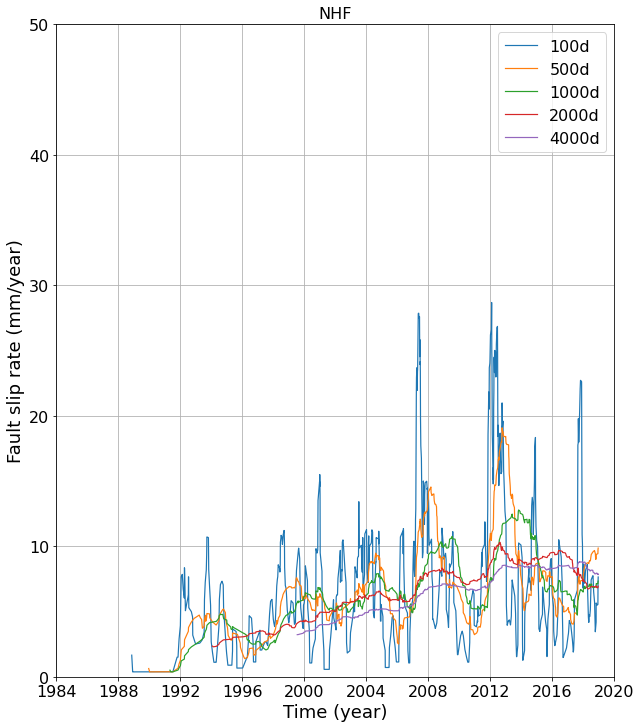

In [68]:
resamp_df_plot(resamp_df_interp_NHF_df, title="NHF")


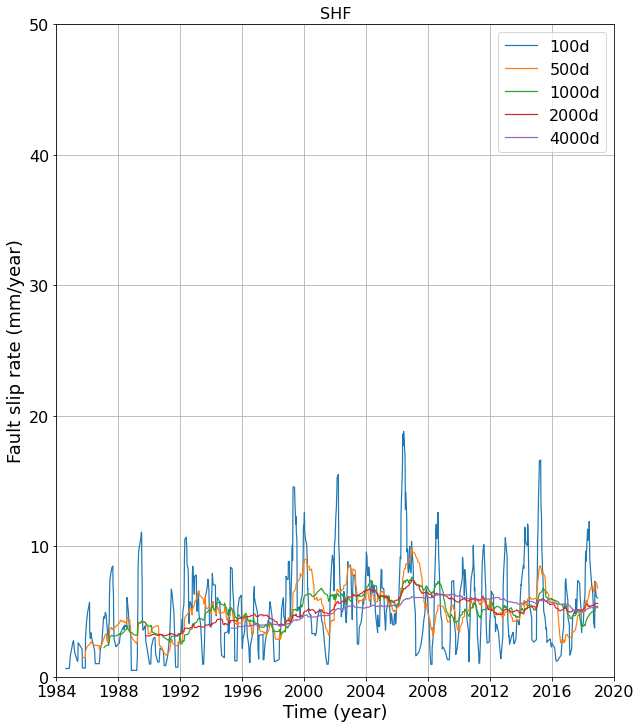

In [69]:
resamp_df_plot(resamp_df_interp_SHF_df,title="SHF")


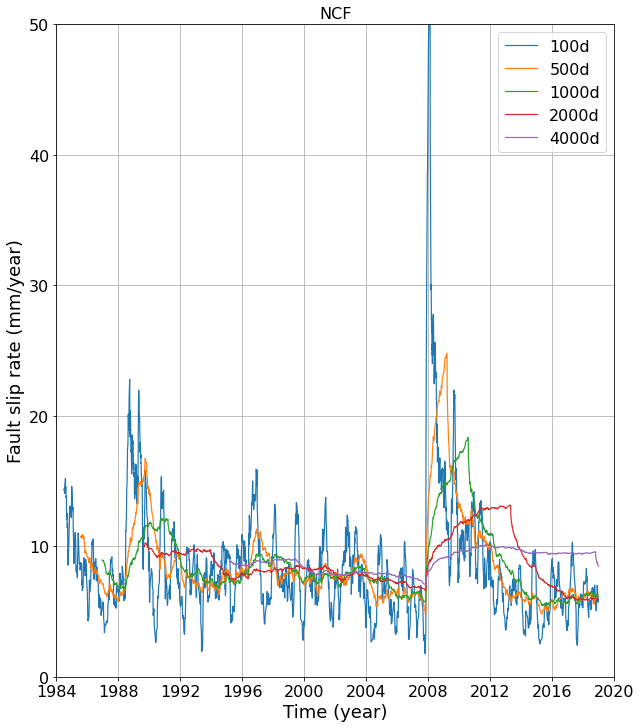

In [70]:
resamp_df_plot(resamp_df_interp_NCF_df, title="NCF")


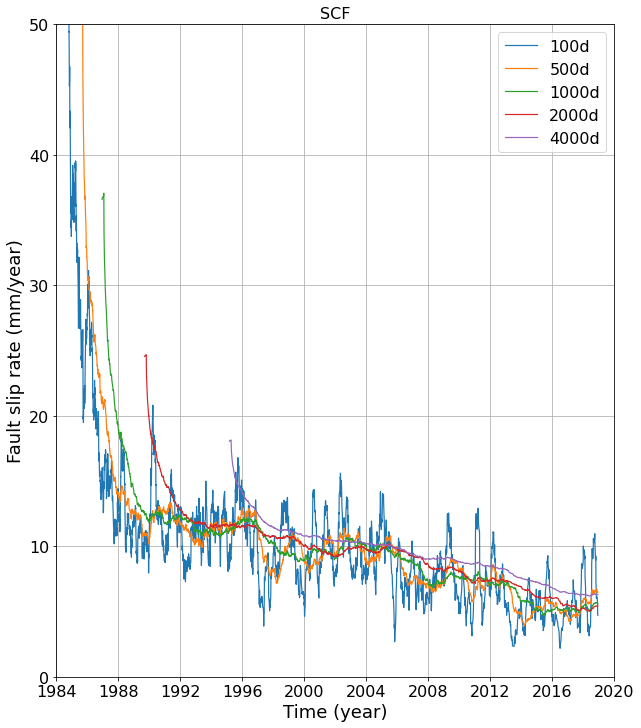

In [71]:
resamp_df_plot(resamp_df_interp_SCF_df, title="SCF")


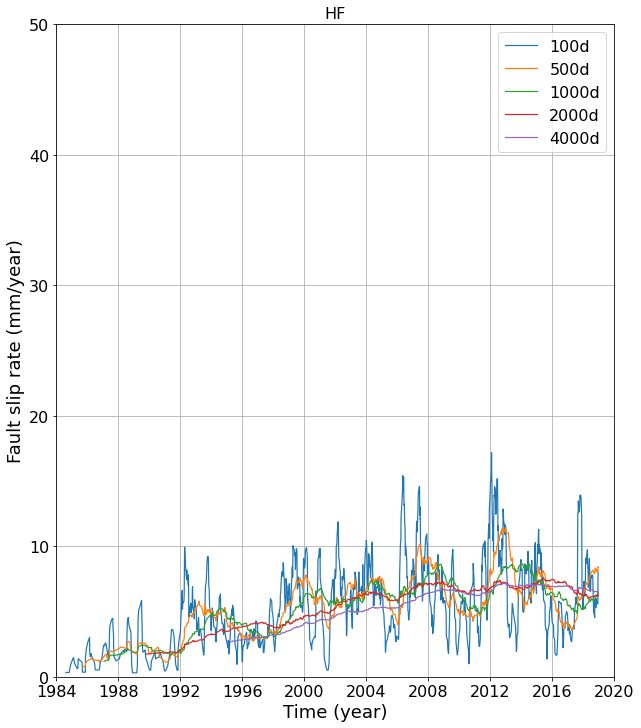

In [72]:
resamp_df_plot(resamp_df_interp_HF_df, title="HF")


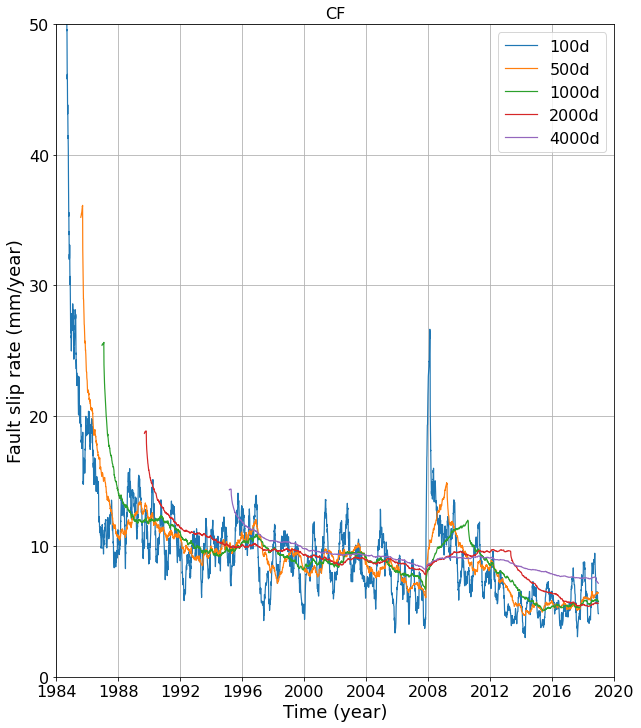

In [73]:
resamp_df_plot(resamp_df_interp_CF_df, title="CF")


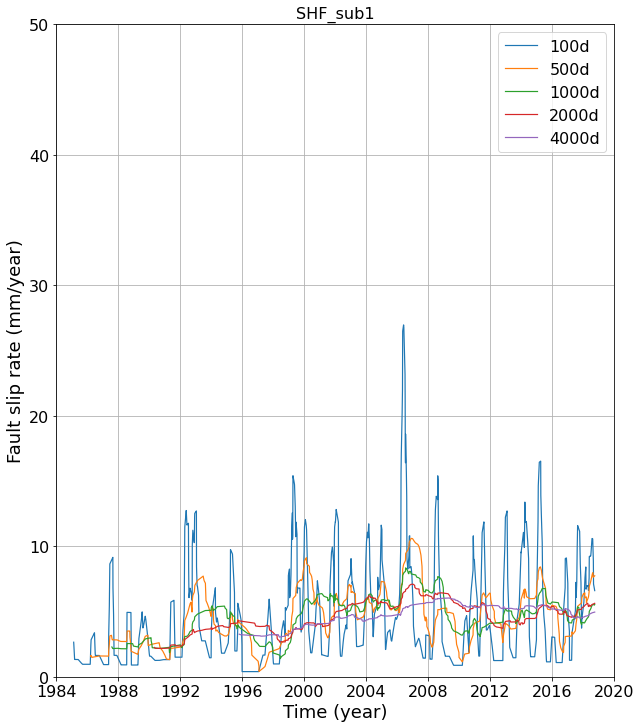

In [74]:
resamp_df_plot(resamp_df_interp_SHF_sub1_df, title="SHF_sub1")


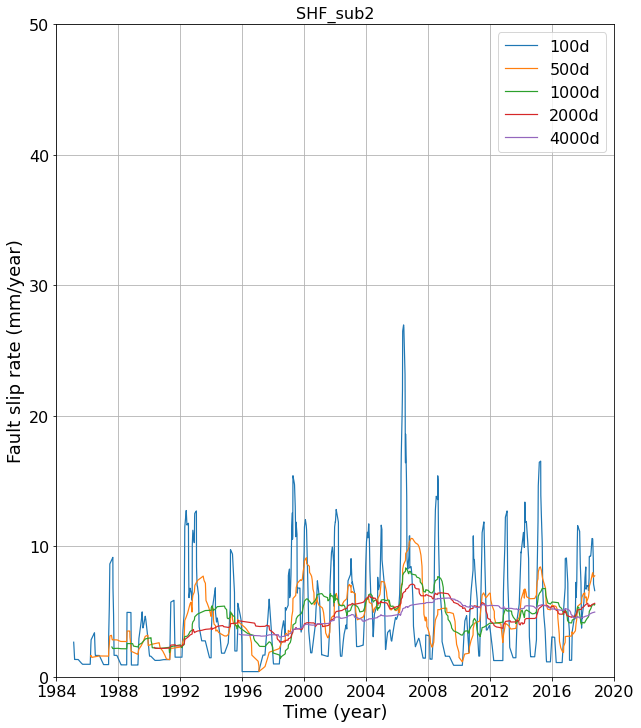

In [75]:
resamp_df_plot(resamp_df_interp_SHF_sub1_df, title="SHF_sub2")


In [76]:
def resamp_df_fsegment_plot(resamp_df_interp_NHF_df, resamp_df_interp_SHF_df, resamp_df_interp_HF_df, resamp_df_interp_NCF_df, resamp_df_interp_SCF_df, resamp_df_interp_CF_df, day_interval, sxmin="1984-01-01", sxmax="2020-01-01", ymin=0, ymax=50, saveOPT=True):

    shift_day = str(day_interval)+'D'
    png_fi = "HFRC_fault_slip_"+shift_day+".png"


    #plt.rcParams['figure.figsize'] = 12, 10
    #plt.rcParams['figure.figsize'] = 7, 8
    plt.rcParams['figure.figsize'] = 10, 12


    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_100D'],  linewidth=2.0, label="100d")
    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_500D'],  linewidth=2.0, label="500d")
    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_1000D'], linewidth=2.0, label="1000d")
    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_2000D'], linewidth=2.0, label="2000d")
    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_4000D'], linewidth=2.0, label="4000d")

    linewidth = 1.0
    linewidth2 = 2.0

    plt.plot(resamp_df_interp_NHF_df.index, resamp_df_interp_NHF_df['NorAccD_mm_per_year'+'_'+shift_day], label="NHF", linewidth=linewidth)
    plt.plot(resamp_df_interp_SHF_df.index, resamp_df_interp_SHF_df['NorAccD_mm_per_year'+'_'+shift_day], label="SHF", linewidth=linewidth)
    plt.plot(resamp_df_interp_HF_df.index, resamp_df_interp_HF_df['NorAccD_mm_per_year'+'_'+shift_day], label="HF", linewidth=linewidth2)
    
    plt.plot(resamp_df_interp_NCF_df.index, resamp_df_interp_NCF_df['NorAccD_mm_per_year'+'_'+shift_day], label="NCF", linewidth=linewidth)
    plt.plot(resamp_df_interp_SCF_df.index, resamp_df_interp_SCF_df['NorAccD_mm_per_year'+'_'+shift_day], label="SCF", linewidth=linewidth)
    plt.plot(resamp_df_interp_CF_df.index, resamp_df_interp_CF_df['NorAccD_mm_per_year'+'_'+shift_day], label="CF", linewidth=linewidth2)

    #import datetime

    #sxmin = "1984-01-01"
    #sxmax = "2020-01-01"

    #sxmin='2018-09-05'
    #sxmax='2018-09-07'
    xmin = datetime.strptime(sxmin, '%Y-%m-%d')
    xmax = datetime.strptime(sxmax, '%Y-%m-%d')
    plt.xlim([xmin,xmax])


    #ymin = 0
    #ymax = 40

    plt.ylim([ymin, ymax])


    plt.grid()

    plt.xlabel("Time (year)")
    plt.ylabel("Fault slip rate (mm/year)")
    plt.legend(loc="upper left")
    plt.legend(loc="upper right")

    plt.title(shift_day)


    if saveOPT:
        plt.savefig(png_fi, bbox_inches = 'tight', dpi=150)

    plt.show()




In [88]:
def slip_rate_ratio(resamp_df_interp_df, day_intervals, t1="2010-01-01", t2="2018-01-01"):
    resamp_df_interp_df_t1 = resamp_df_interp_df[resamp_df_interp_df.index == t1]
    resamp_df_interp_df_t2 = resamp_df_interp_df[resamp_df_interp_df.index == t2]

    for day_interval in day_intervals:
    #for day_interval in [4000]:

        #day_interval = 200
        #day_interval = 1000

        shift_day = str(day_interval)+'D'
        #print("# shift_day = ", shift_day)

        slip_rate_t1 = resamp_df_interp_df_t1['NorAccD_mm_per_year'+'_'+shift_day][0]
        slip_rate_t2 = resamp_df_interp_df_t2['NorAccD_mm_per_year'+'_'+shift_day][0]
        slip_rate_change = ((slip_rate_t2-slip_rate_t1)/(slip_rate_t1) ) * 100
        print("# shift_day = ", shift_day, " slip_rate_t1 = ", slip_rate_t1, " slip_rate_t2 = ", slip_rate_t2, " slip_rate_change = ", slip_rate_change)
        #print(slip_rate_change)



In [89]:

slip_rate_ratio(resamp_df_interp_NHF_df, day_intervals)
slip_rate_ratio(resamp_df_interp_SHF_df, day_intervals)
slip_rate_ratio(resamp_df_interp_HF_df, day_intervals)

slip_rate_ratio(resamp_df_interp_NCF_df, day_intervals)
slip_rate_ratio(resamp_df_interp_SCF_df, day_intervals)
slip_rate_ratio(resamp_df_interp_CF_df, day_intervals)


# shift_day =  100D  slip_rate_t1 =  2.5220052621516253  slip_rate_t2 =  8.390794204372073  slip_rate_change =  232.70327902541905
# shift_day =  500D  slip_rate_t1 =  6.444243839665539  slip_rate_t2 =  7.932107546306025  slip_rate_change =  23.088258974348598
# shift_day =  1000D  slip_rate_t1 =  8.39923813541246  slip_rate_t2 =  6.720642344128463  slip_rate_change =  -19.985095841095195
# shift_day =  2000D  slip_rate_t1 =  7.5603763365617915  slip_rate_t2 =  7.412708571402313  slip_rate_change =  -1.9531800876810932
# shift_day =  4000D  slip_rate_t1 =  6.9090236614675575  slip_rate_t2 =  8.759246909008777  slip_rate_change =  26.779807657341415
# shift_day =  100D  slip_rate_t1 =  4.785631067880759  slip_rate_t2 =  4.458886676656086  slip_rate_change =  -6.827613466020195
# shift_day =  500D  slip_rate_t1 =  3.4649924630861366  slip_rate_t2 =  5.033171780127393  slip_rate_change =  45.2577987902617
# shift_day =  1000D  slip_rate_t1 =  4.477914565737072  slip_rate_t2 =  3.895439445

In [90]:
slip_rate_ratio(resamp_df_interp_SHF_df, day_intervals)


# shift_day =  100D  slip_rate_t1 =  4.785631067880759  slip_rate_t2 =  4.458886676656086  slip_rate_change =  -6.827613466020195
# shift_day =  500D  slip_rate_t1 =  3.4649924630861366  slip_rate_t2 =  5.033171780127393  slip_rate_change =  45.2577987902617
# shift_day =  1000D  slip_rate_t1 =  4.477914565737072  slip_rate_t2 =  3.895439445855266  slip_rate_change =  -13.007731865601798
# shift_day =  2000D  slip_rate_t1 =  5.76482034154432  slip_rate_t2 =  5.181547531084293  slip_rate_change =  -10.11779684193551
# shift_day =  4000D  slip_rate_t1 =  6.2013443292057255  slip_rate_t2 =  4.979817324035117  slip_rate_change =  -19.697777454764605


In [91]:
slip_rate_ratio(resamp_df_interp_SHF_sub1_df, day_intervals)


# shift_day =  100D  slip_rate_t1 =  0.8810812936753873  slip_rate_t2 =  5.452061696788174  slip_rate_change =  518.7921291626982
# shift_day =  500D  slip_rate_t1 =  1.4400806125511254  slip_rate_t2 =  6.3582177958521315  slip_rate_change =  341.518185887417
# shift_day =  1000D  slip_rate_t1 =  3.2934540660462504  slip_rate_t2 =  4.15335455286601  slip_rate_change =  26.109381505722933
# shift_day =  2000D  slip_rate_t1 =  5.462471367819967  slip_rate_t2 =  5.357087042617703  slip_rate_change =  -1.9292426102788394
# shift_day =  4000D  slip_rate_t1 =  5.7471375727483665  slip_rate_t2 =  4.575151113448978  slip_rate_change =  -20.392524878065984


In [92]:
slip_rate_ratio(resamp_df_interp_SHF_sub2_df, day_intervals)


# shift_day =  100D  slip_rate_t1 =  12.442176655640953  slip_rate_t2 =  3.5126636295603273  slip_rate_change =  -71.76809390527518
# shift_day =  500D  slip_rate_t1 =  7.294807003573814  slip_rate_t2 =  3.2833462716487287  slip_rate_change =  -54.99063552962844
# shift_day =  1000D  slip_rate_t1 =  6.481971679325915  slip_rate_t2 =  3.463322364779376  slip_rate_change =  -46.56992445947342
# shift_day =  2000D  slip_rate_t1 =  6.364362355361534  slip_rate_t2 =  4.817883397980008  slip_rate_change =  -24.299040045680687
# shift_day =  4000D  slip_rate_t1 =  6.953745305793831  slip_rate_t2 =  5.666076825207784  slip_rate_change =  -18.517625020191158


day_interval =  100


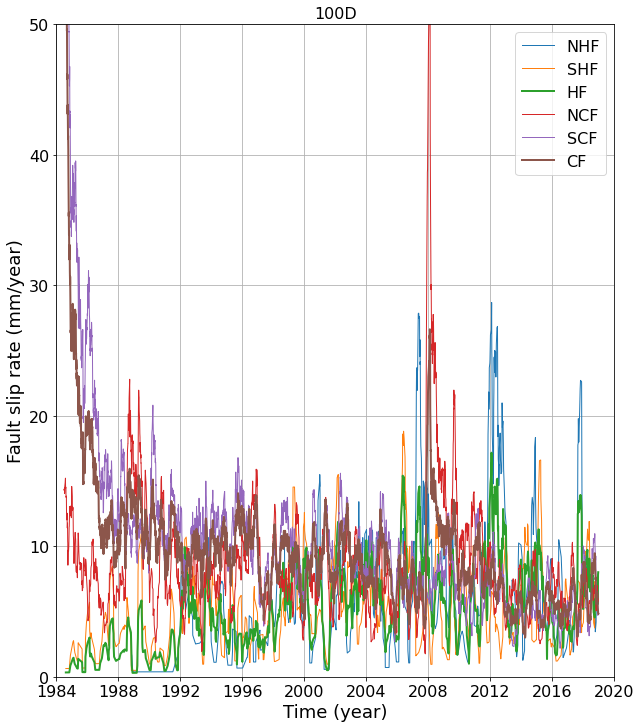

day_interval =  500


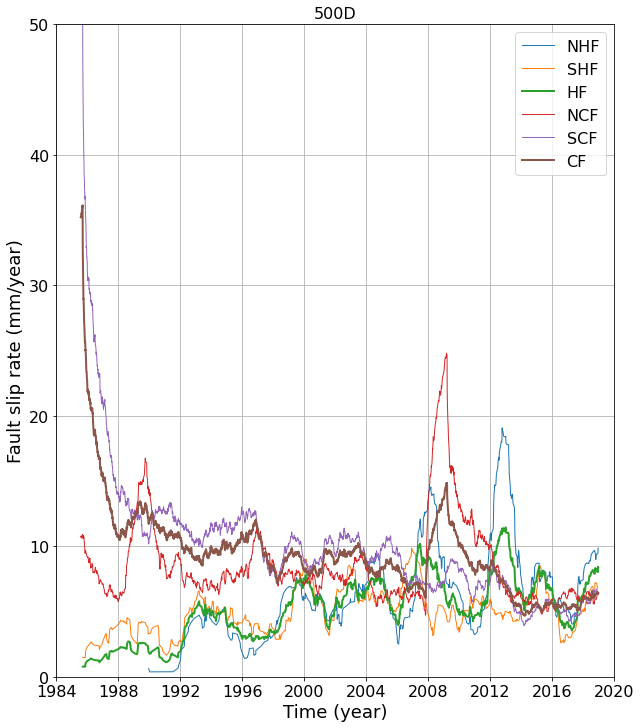

day_interval =  1000


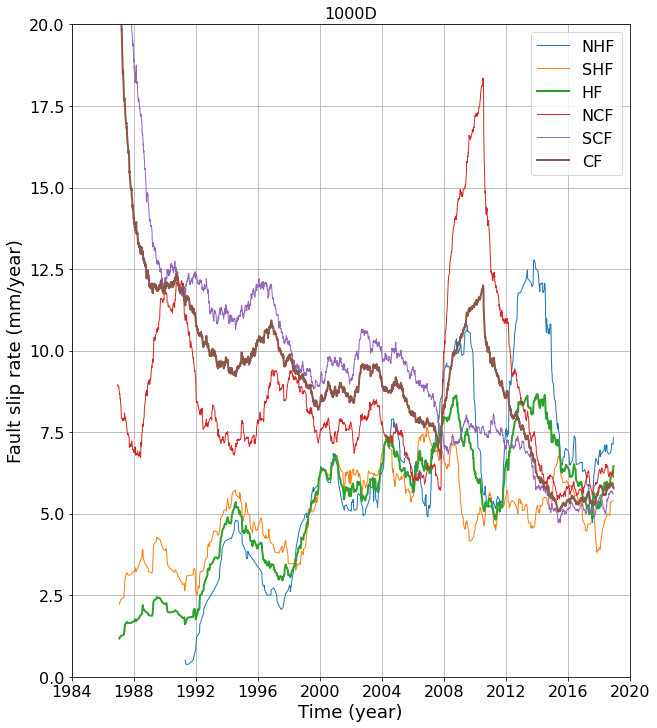

day_interval =  2000


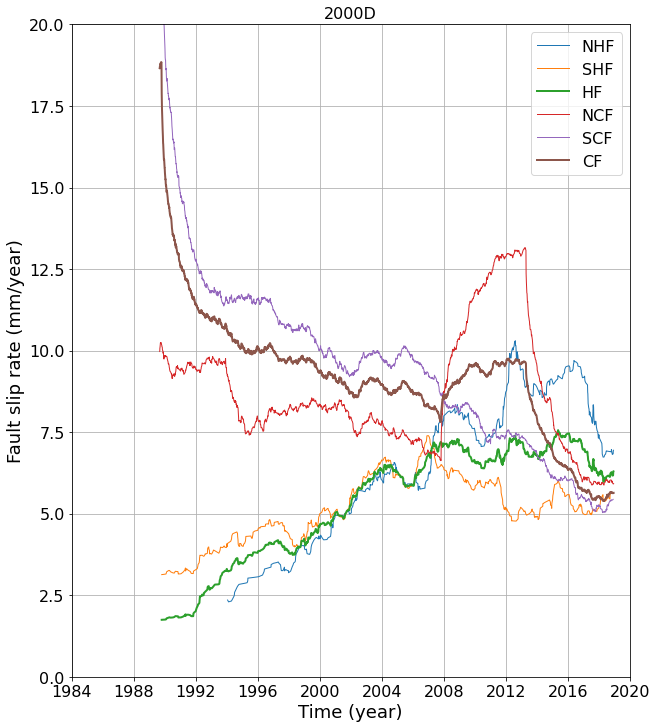

day_interval =  4000


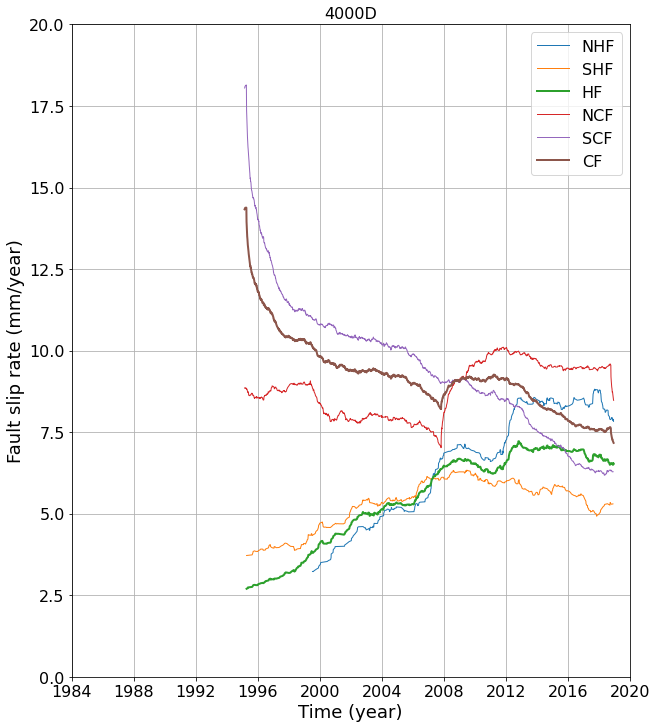

In [93]:
for day_interval in day_intervals:
    ymin=0.0
    ymax=50.0
    print("day_interval = ", day_interval)
    if day_interval == 1000:
        ymin=0
        ymax=20
    if day_interval == 2000:
        ymin=0
        ymax=20
    if day_interval == 4000:
        ymin=0
        ymax=20
    resamp_df_fsegment_plot(resamp_df_interp_NHF_df, resamp_df_interp_SHF_df, resamp_df_interp_HF_df, resamp_df_interp_NCF_df, resamp_df_interp_SCF_df, resamp_df_interp_CF_df, day_interval, sxmin="1984-01-01", sxmax="2020-01-01", ymin=ymin, ymax=ymax, saveOPT=True)


In [98]:
def resamp_df_fsegment_plot_SHF(resamp_df_interp_SHF_df, resamp_df_interp_SHF_sub1_df, resamp_df_interp_SHF_sub2_df, day_interval, sxmin="1984-01-01", sxmax="2020-01-01", ymin=0, ymax=50, saveOPT=True):

    shift_day = str(day_interval)+'D'
    png_fi = "HFRC_fault_slip_"+shift_day+".png"


    #plt.rcParams['figure.figsize'] = 12, 10
    #plt.rcParams['figure.figsize'] = 7, 8
    plt.rcParams['figure.figsize'] = 10, 12


    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_100D'],  linewidth=2.0, label="100d")
    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_500D'],  linewidth=2.0, label="500d")
    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_1000D'], linewidth=2.0, label="1000d")
    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_2000D'], linewidth=2.0, label="2000d")
    #plt.plot(resamp_df_interp_df.index, resamp_df_interp_df['NorAccD_mm_per_year_4000D'], linewidth=2.0, label="4000d")

    linewidth = 1.0
    linewidth2 = 2.0

    plt.plot(resamp_df_interp_SHF_df.index, resamp_df_interp_SHF_df['NorAccD_mm_per_year'+'_'+shift_day], label="SHF", linewidth=linewidth2)
    plt.plot(resamp_df_interp_SHF_sub1_df.index, resamp_df_interp_SHF_sub1_df['NorAccD_mm_per_year'+'_'+shift_day], label="SHF_sub1", linewidth=linewidth2)
    plt.plot(resamp_df_interp_SHF_sub2_df.index, resamp_df_interp_SHF_sub2_df['NorAccD_mm_per_year'+'_'+shift_day], label="SHF_sub2", linewidth=linewidth2)


    #import datetime

    #sxmin = "1984-01-01"
    #sxmax = "2020-01-01"

    #sxmin='2018-09-05'
    #sxmax='2018-09-07'
    xmin = datetime.strptime(sxmin, '%Y-%m-%d')
    xmax = datetime.strptime(sxmax, '%Y-%m-%d')
    plt.xlim([xmin,xmax])


    #ymin = 0
    #ymax = 40

    plt.ylim([ymin, ymax])


    plt.grid()

    plt.xlabel("Time (year)")
    plt.ylabel("Fault slip rate (mm/year)")
    plt.legend(loc="upper left")
    plt.legend(loc="upper right")

    plt.title(shift_day)


    if saveOPT:
        plt.savefig(png_fi, bbox_inches = 'tight', dpi=150)

    plt.show()

day_interval =  100


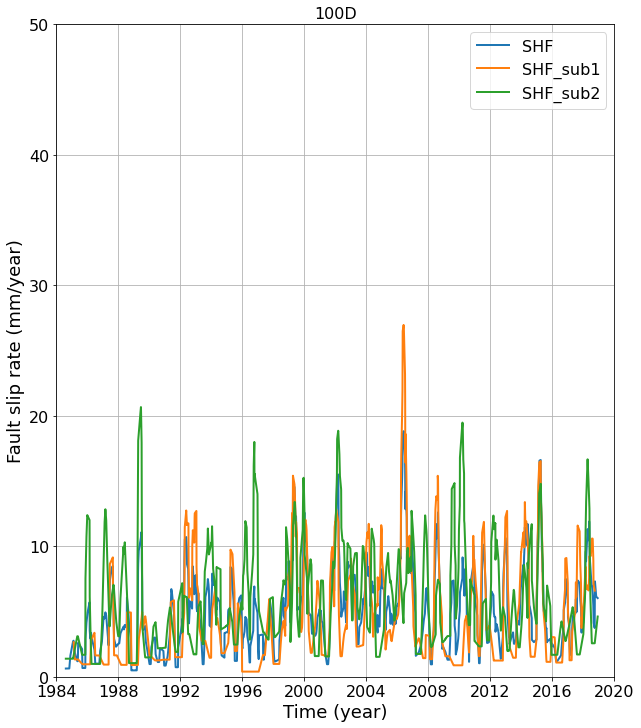

day_interval =  500


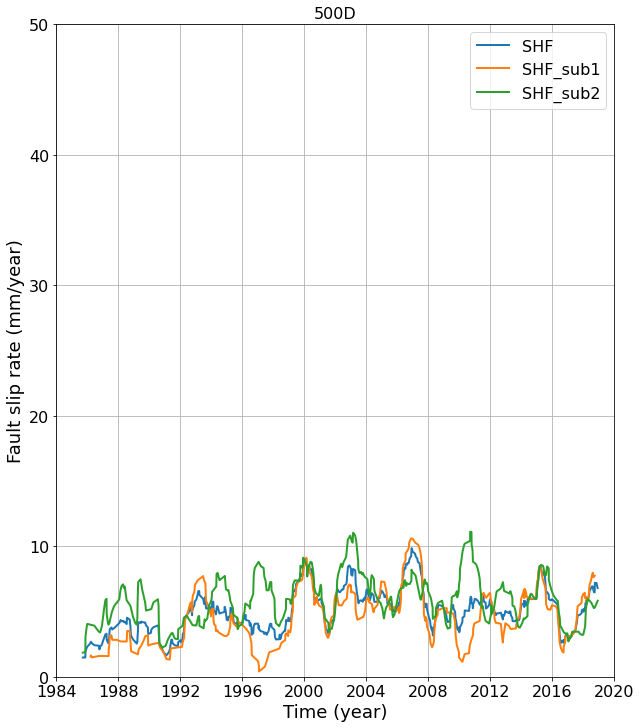

day_interval =  1000


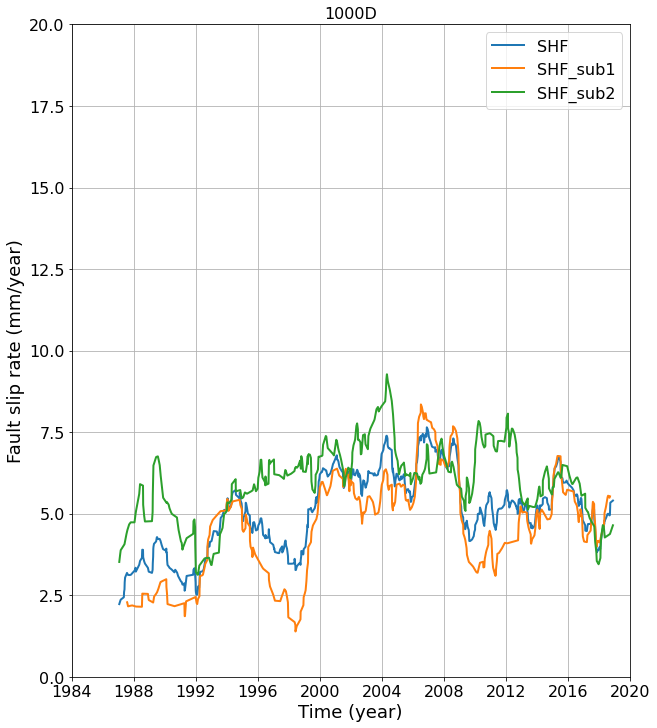

day_interval =  2000


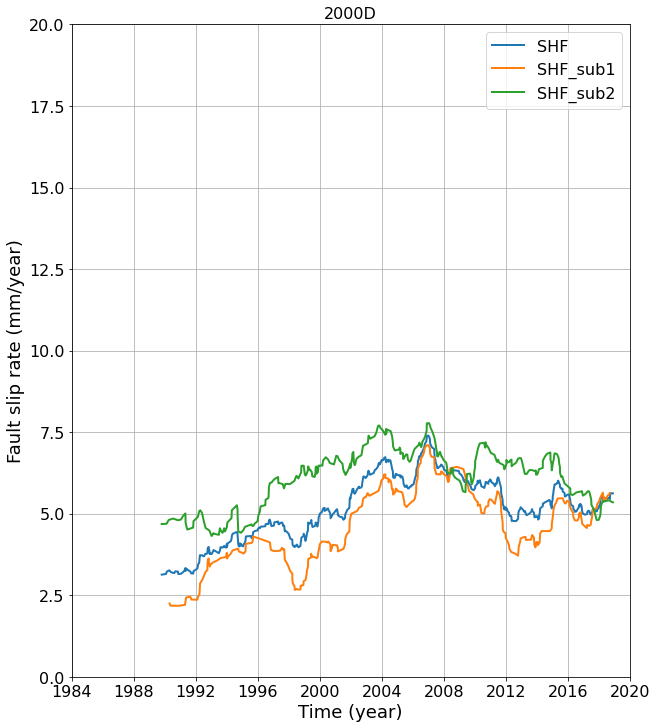

day_interval =  4000


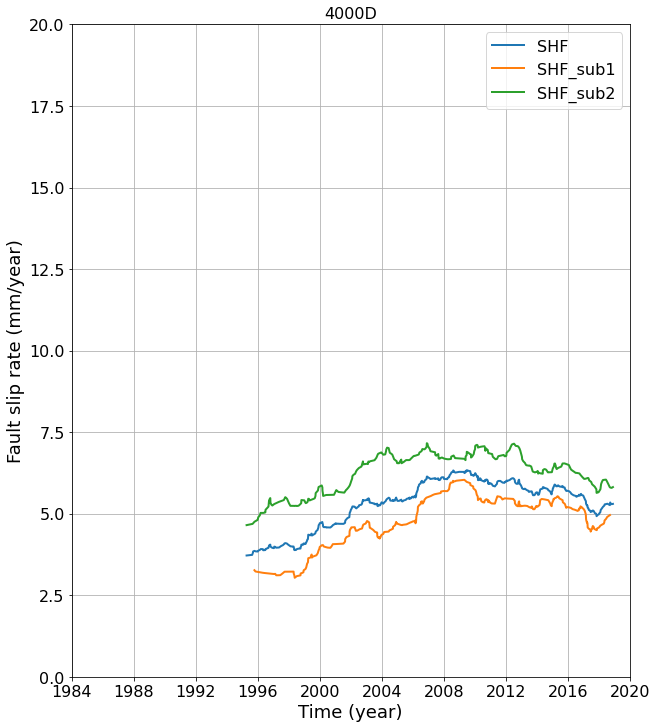

In [99]:
for day_interval in day_intervals:
    ymin=0.0
    ymax=50.0
    print("day_interval = ", day_interval)
    if day_interval == 1000:
        ymin=0
        ymax=20
    if day_interval == 2000:
        ymin=0
        ymax=20
    if day_interval == 4000:
        ymin=0
        ymax=20
    resamp_df_fsegment_plot_SHF(resamp_df_interp_SHF_df, resamp_df_interp_SHF_sub1_df, resamp_df_interp_SHF_sub2_df, day_interval, sxmin="1984-01-01", sxmax="2020-01-01", ymin=ymin, ymax=ymax, saveOPT=True)


NameError: name 'df_interp' is not defined

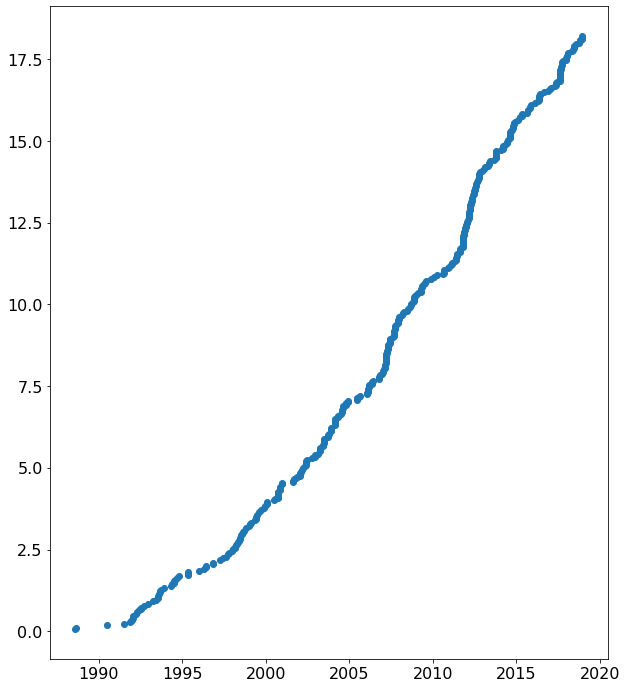

In [100]:
plt.plot(NHF_df['timeY'], NHF_df['NorAccDCm'], "o")
plt.plot(df_interp['timeY'], df_interp['NorAccDCm'])


In [101]:
df_time_index(df_interp)

NameError: name 'df_interp' is not defined

NameError: name 'df_interp' is not defined

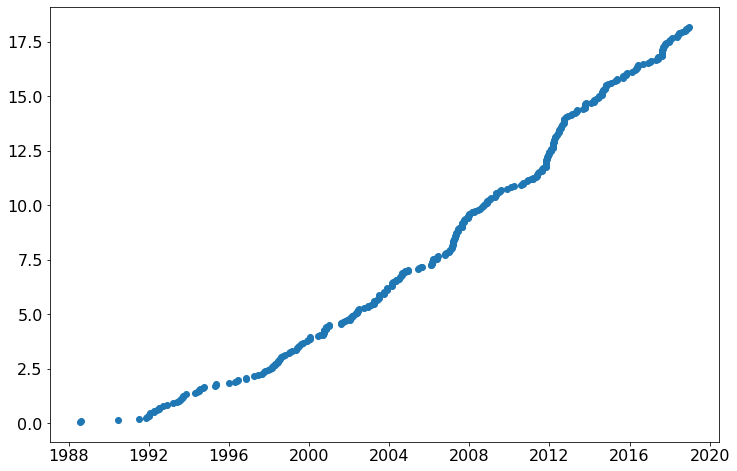

In [ ]:
plt.plot(NHF_df.index, NHF_df['NorAccDCm'], "o")
plt.plot(df_interp.index, df_interp['NorAccDCm'])


In [ ]:
#df_interp

In [ ]:
df_interp = df_interp.drop('timeUTC', axis=1)
df_interp = df_interp.drop('timeY', axis=1)

In [ ]:
df_interp

In [ ]:


resamp_df_interp = df_interp.resample('1D', label='right').median()
resamp_df_interp

In [ ]:
plt.plot(NHF_df.index, NHF_df['NorAccDCm'], "o")

plt.plot(resamp_df_interp.index, resamp_df_interp['NorAccDCm'])


In [ ]:
day_interval = 200
day_interval = 1000

shift_day = str(day_interval)+'D'
print("# shift_day = ", shift_day)

# use 366 days
coeff_for_day_to_year = 366.0
print("# coeff_for_day_to_year = ", coeff_for_day_to_year)

#print(df - df.shift(freq='2D'))
diff_resamp_df_interp = resamp_df_interp - resamp_df_interp.shift(freq=shift_day)

In [ ]:
resamp_df_interp

In [ ]:
diff_resamp_df_interp

In [ ]:
diff_resamp_df_interp['NorAccD_mm_per_year'] = ((diff_resamp_df_interp['NorAccDCm'] / day_interval ) * coeff_for_day_to_year ) * 10.0

In [ ]:
plt.plot(diff_resamp_df_interp.index, diff_resamp_df_interp['NorAccD_mm_per_year'])

In [ ]:
time_interp

In [ ]:
slip_rate = np.gradient(slip_interp, time_interp)
slip_rate_dev_t = np.gradient(slip_rate, time_interp)


In [ ]:
plt.plot(slip_rate, "o")

In [ ]:
plt.plot(slip_rate_dev_t, "o")

In [ ]:
NHF_df['NorAccDCm_per_year'] = NHF_df['NorAccDCm'].diff()/NHF_df['timeY'].diff()
NHF_df['NorAccDCm_per_year_square'] = NHF_df['NorAccDCm_per_year'].diff()/NHF_df['timeY'].diff()

In [ ]:
plt.rcParams['figure.figsize'] = 7, 8
png_fi = "HFRC_slip_rate.png"

plt.plot(NHF_df['timeY'], NHF_df['NorAccDCm_per_year'], label="NHF")
#plt.plot(SHF_df['timeY'], SHF_df['NorAccDCm'], label="SHF")

#plt.plot(HF_df['timeY'], HF_df['NorAccDCm'], label="HF", linewidth=2.0)

#plt.plot(NCF_df['timeY'], NCF_df['NorAccDCm'], label="NCF")
#plt.plot(SCF_df['timeY'], SCF_df['NorAccDCm'], label="SCF")

#plt.plot(CF_df['timeY'], CF_df['NorAccDCm'], label="CF", linewidth=2.0)


xmin = 1984
xmax = 2020
ymin = 0
ymax = 40

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])


plt.grid()

plt.xlabel("Time (year)")
plt.ylabel("Fault slip rate (cm/year)")
plt.legend(loc="upper left")

plt.savefig(png_fi, bbox_inches = 'tight', dpi=150)

In [ ]:
plt.rcParams['figure.figsize'] = 7, 8
png_fi = "HFRC_slip_rate.png"

plt.plot(NHF_df['timeY'], NHF_df['NorAccDCm_per_year_square'], label="NHF")